In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import DBSCAN

In [2]:
np.random.seed(42)

In [3]:
def create_circular_data(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

def create_data_set():
    data_set=pd.DataFrame(create_circular_data(500,1000))
    data_set=data_set.append(create_circular_data(300,700))
    data_set=data_set.append(create_circular_data(100,300))
    return data_set

In [4]:
def add_noise_to_data(data):
    noisy_data=data.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])
    return noisy_data

In [5]:
def visualize_data(data):
    plt.figure(figsize=(10,10))
    plt.scatter(data[0],data[1],s=15,color='grey')
    plt.title('Noisy circular dataset',fontsize=20)
    plt.xlabel('Feature 1',fontsize=14)
    plt.ylabel('Feature 2',fontsize=14)
    plt.show()

In [6]:
data_set = create_data_set()
noisy_data_set = add_noise_to_data(data_set)

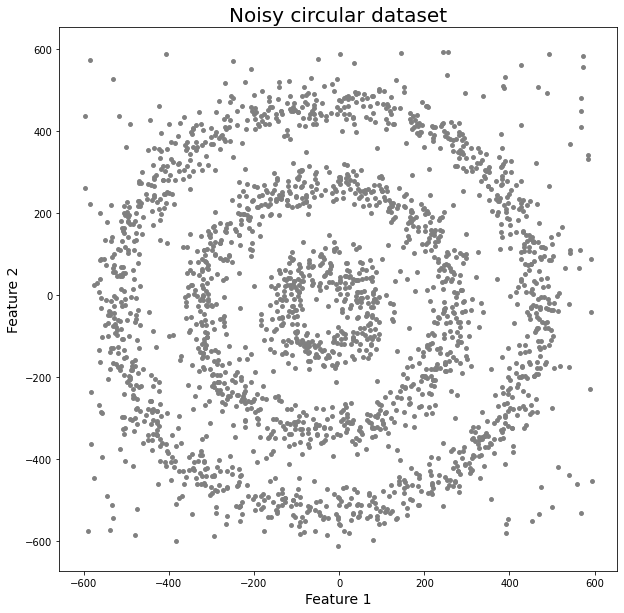

In [7]:
visualize_data(noisy_data_set)

In [8]:
def perform_dbscan_clustering(data, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data[[0,1]])
    return dbscan

In [9]:
def visualize_dbscan_results(data, clustering_results):
    data['DBSCAN_labels']=clustering_results.labels_ 
    # Plotting resulting clusters
    colors=['purple','red','blue','green']
    plt.figure(figsize=(10,10))
    plt.scatter(data[0],data[1],c=data['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
    plt.title('DBSCAN Clustering',fontsize=20)
    plt.xlabel('Feature 1',fontsize=14)
    plt.ylabel('Feature 2',fontsize=14)
    plt.show()

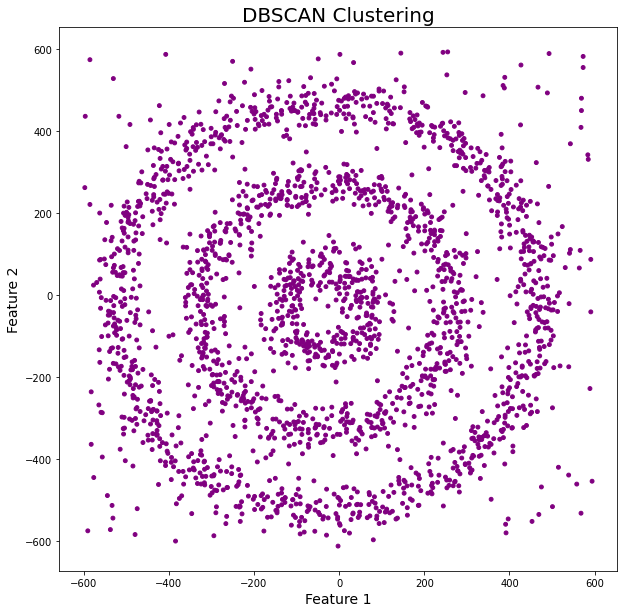

In [10]:
clustering_result = perform_dbscan_clustering(noisy_data_set)
visualize_dbscan_results(noisy_data_set, clustering_result)

In [ ]:
clustering_result = perform_dbscan_clustering(noisy_data_set, eps=30, min_samples=6)
visualize_dbscan_results(noisy_data_set, clustering_result)